Always remember: You have to work hard in Math and Code in order to be 
successful in this diploma and later in your career.  <br>

• If we have the data points (x_points, y_points) with x_points = [1,1,2,3,4,5,6,7,8,9,10,11]  
and y_points = [1,2,3,1,4,5,6,4,7,10,15,9], use the GD algorithm to find the best values for theta0 and theta1  
(having y = theta0 + theta1*x the equation of a line that should fit the data points). <br>


• Explore the following to be ready for the practical session (write simple 
example for each one to demonstrate your ability to use it): <br>
  
- [x] How to import NumPy library.
- [x] Matrices and vectors operations using NumPy. 
- [x] How to import matplotlib.pyplot. 
- [x] How to make matplotlib inline. 
- [ ] How to read data from csv file to NumPy array. 
- [x] How to select a specific column from NumPy array (very important). 
- [x] Using Matplotlib Scatter plot to plot (x,y) data. 
- [x] Using Matplotlib to plot a straight line. 
- [x] Using r2 score from sklearn.metrics to evaluate prediction performance. 
     

import section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
%matplotlib inline

The Data

In [2]:
x = np.array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(12,1)
y = np.array([1, 2, 3, 1, 4, 5, 6, 4, 7, 10, 15, 9]).reshape(12,1)

#### Gradient descent 

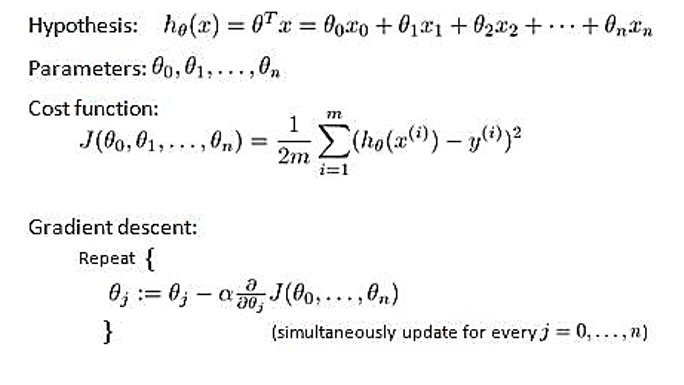
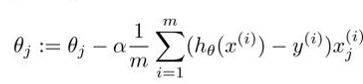

In [3]:
def gradient_descent(x, y, number_of_iteratins=100, learing_rate =0.05):
    
    thetas = []
    costs = []
    accrs = []
    theta = np.zeros(x.shape[1]+1).reshape((x.shape[1]+1,1))
    x_and1 = np.hstack((np.ones((x.shape[0],1)),x)) 
    
    for i in range(number_of_iteratins):
        #get the hypothesis
        y_hat = np.dot(x_and1, theta)
        #calc the M and start minizmize the cose
        m = len(y)
        #get the cost to draw later
        cost = 1/(2*m) * np.dot((y_hat - y).T, (y_hat - y))
        costs.append(cost[0])
        
        theta -= (learing_rate * (1/m))* np.dot(x_and1.T,(y_hat - y))
        thetas.append(theta)
        acc = skm.r2_score(y,y_hat) 
        accrs.append(acc)
      
    return thetas[costs.index(min(costs))],thetas,costs, accrs

best accuracy is: 75.6 % smallest cost: 1.92073


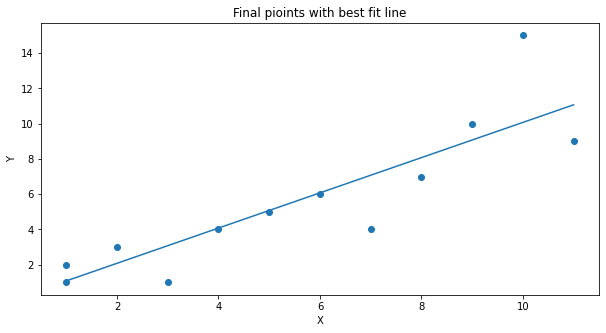

In [4]:
theta,thetas,costs,accuracy = gradient_descent(x, y, 50, .01)

fig = plt.figure(figsize=(10,5))

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Final pioints with best fit line")


plt.scatter(x, y)
x_and1 = np.hstack((np.ones((x.shape[0],1)),x)) 
y_hat = np.dot(x_and1, theta)
plt.plot(x,y_hat)
print('best accuracy is:',round(accuracy[costs.index(min(costs))]*100,2)
      ,"%", "smallest cost:" , round(costs[costs.index(min(costs))][0],5))
plt.show()

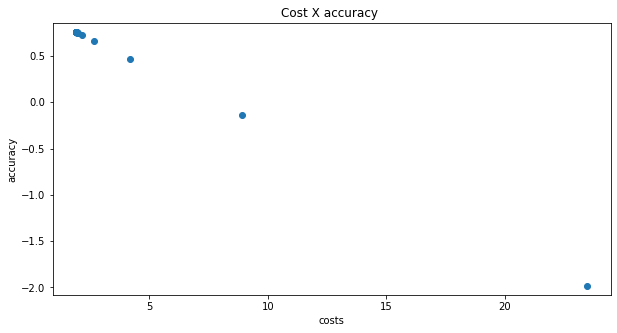

In [5]:
fig = plt.figure(figsize=(10,5))
plt.xlabel('costs')
plt.ylabel('accuracy')
plt.title("Cost X accuracy ")
accuracy =np.array(accuracy)
plt.xlim([min(costs)-1, max(costs)+1])
plt.ylim([min(accuracy)-.1, max(accuracy)+.1])
plt.scatter(costs, accuracy);